<a href="https://colab.research.google.com/github/bilalsahi/appointment-agent/blob/main/Openai_agents_sdk_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
from agents import Agent, Runner, AsyncOpenAI, set_default_openai_client, set_tracing_disabled, set_default_openai_api
from google.colab import userdata

gemini_api_key = userdata.get('GEMINI_API_KEY')

set_tracing_disabled(True)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
set_default_openai_client(external_client)

agent: Agent = Agent(name="Assistant",
              instructions="You are a helpful assistant",
              model="gemini-2.0-flash")

result = Runner.run_sync(agent, "Hello")

print(result.final_output)

Hello! How can I help you today?



In [5]:
from agents import enable_verbose_stdout_logging

enable_verbose_stdout_logging()

agent : Agent = Agent(name="Assistant",
              instructions="You are a helpful assistant",
              model="gemini-1.5-flash")

result = Runner.run_sync(agent, "Hello, my name is Bilal")

print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a85e47f50>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a85e47f50>


Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4ab1501cd0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4ab1501cd0>


[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Hello, my name is Bilal"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Hello, my name is Bilal"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "Hello Bilal, it's nice to meet you! How can I help you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



DEBUG:openai.agents:LLM resp:
{
  "content": "Hello Bilal, it's nice to meet you! How can I help you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace


DEBUG:openai.agents:Resetting current trace


Hello Bilal, it's nice to meet you! How can I help you today?



In [8]:
from agents import enable_verbose_stdout_logging, function_tool

enable_verbose_stdout_logging()

@function_tool
def get_current_weather(city: str)->str:
  """Return Weather for the city
  Arg:
    city: City name
  Returns:
    Weather: str
  """
  return f"{city} weather is sunny"

agent : Agent = Agent(name="Assistant",
              instructions="You are a helpful assistant",
              model="gemini-1.5-flash",
              tools= [get_current_weather])

result = Runner.run_sync(agent, "What is the weather in Karachi")

print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e848f50>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e848f50>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e848f50>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e848f50>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e848f50>


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82ab70>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82ab70>


[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  }
]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "des

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  }
]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:


DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e82ab70>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e82ab70>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e82ab70>


Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}


DEBUG:openai.agents:Invoking tool get_current_weather with input {"city":"Karachi"}


Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['Karachi'], kwargs: {}


Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny


DEBUG:openai.agents:Tool get_current_weather returned Karachi weather is sunny


Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)


DEBUG:openai.agents:Running agent Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82a7b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82a7b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82a7b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82a7b0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e82a7b0>


[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"Karachi\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Karachi weather is sunny"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
     

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"Karachi\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Karachi weather is sunny"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProp

LLM resp:
{
  "content": "Karachi weather is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Karachi weather is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Karachi weather is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Karachi weather is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



DEBUG:openai.agents:LLM resp:
{
  "content": "Karachi weather is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


Karachi weather is sunny.



#get multiple tools

In [10]:
from agents import enable_verbose_stdout_logging, function_tool

enable_verbose_stdout_logging()

@function_tool
def get_current_weather(city: str)->str:
  """Return Weather for the city
  Arg:
    city: City name
  Returns:
    Weather: str
  """
  return f"{city} weather is sunny"

@function_tool
def get_current_news(industry: str) -> str :
  """Returns current news for a particular industry

  Arg:
    industry: The industry to look in current News
  Returns:
    news
  """
  return f"{industry}have new concept Agent native Cloud"

agent : Agent = Agent(name="Assistant",
              instructions="You are a helpful assistant",
              model="gemini-1.5-flash",
              tools= [get_current_weather, get_current_news])

result = Runner.run_sync(agent, "What is the weather in Karachi and there latest new in tech")

print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e84a8d0>


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e84ae10>


[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi and there latest new in tech"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular industry",
      "parameters": {
        "properties": {
          "industry": {
            "title": "Industry",
            "type": "string"
          }


DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi and there latest new in tech"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weather: str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular industry",
      "parameters": {
        "properties": {
          "industry": {
            "title": "Industry",
            "type": "

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}

LLM resp

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"Karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e84ae10>


Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7e4a7e884a10>


Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}
Invoking tool get_current_weather with input {"city":"Karachi"}


DEBUG:openai.agents:Invoking tool get_current_weather with input {"city":"Karachi"}


Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}
Tool call args: ['Karachi'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['Karachi'], kwargs: {}


Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny
Tool get_current_weather returned Karachi weather is sunny


DEBUG:openai.agents:Tool get_current_weather returned Karachi weather is sunny


Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}


DEBUG:openai.agents:Invoking tool get_current_news with input {"industry":"tech"}


Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['tech'], kwargs: {}


Tool get_current_news returned techhave new concept Agent native Cloud
Tool get_current_news returned techhave new concept Agent native Cloud
Tool get_current_news returned techhave new concept Agent native Cloud
Tool get_current_news returned techhave new concept Agent native Cloud
Tool get_current_news returned techhave new concept Agent native Cloud
Tool get_current_news returned techhave new concept Agent native Cloud


DEBUG:openai.agents:Tool get_current_news returned techhave new concept Agent native Cloud


Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)


DEBUG:openai.agents:Running agent Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e884ad0>


[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi and there latest new in tech"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"Karachi\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_news",
          "arguments": "{\"industry\":\"tech\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Karachi weather is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "techhave new concept Agent native Cloud"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City name\nReturns:\n  Weath

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is the weather in Karachi and there latest new in tech"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"Karachi\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_news",
          "arguments": "{\"industry\":\"tech\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Karachi weather is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "techhave new concept Agent native Cloud"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Return Weather for the city\nArg:\n  city: City nam

LLM resp:
{
  "content": "The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  

DEBUG:openai.agents:LLM resp:
{
  "content": "The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


The weather in Karachi is sunny.  The latest tech news includes a new concept called Agent native Cloud.



#inovation with tools like handoffs

In [11]:
from agents import enable_verbose_stdout_logging, function_tool

enable_verbose_stdout_logging()

panaversity_expert: Agent = Agent(name="Panaversity Assistant",
              instructions="You are a helpful assistant. You answer all about panaversity.",
              model="gemini-1.5-flash",
              handoff_description= "Panaversity Expert"  )

agentic_ai_expert: Agent = Agent(name="Agentic AI Assistant",
              instructions="You are a helpful agentic ai expert. You answer all about AI Agents.",
              model="gemini-1.5-flash",
              handoff_description= "Agentic AI Expert"  )

triage_agent: Agent = Agent(name="Triage Agent",
              instructions="You are a general chat assistant. You observe the communication with user and let relevant agent.",
              model="gemini-1.5-flash",
              handoffs= [panaversity_expert, agentic_ai_expert]  )


result = Runner.run_sync(triage_agent, "Who is the founder of PIAIC")

print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a5010>


Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)


DEBUG:openai.agents:Running agent Triage Agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6c3c50>


[
  {
    "content": "You are a general chat assistant. You observe the communication with user and let relevant agent.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_panaversity_assistant",
      "description": "Handoff to the Panaversity Assistant agent to handle the request. Panaversity Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai_assistant",
      "description": "Handoff to the Agentic AI Assistant agent to handle the request. Agentic AI Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  }
]
Stream: False
Tool choice: NOT_GIVEN
Response fo

DEBUG:openai.agents:[
  {
    "content": "You are a general chat assistant. You observe the communication with user and let relevant agent.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_panaversity_assistant",
      "description": "Handoff to the Panaversity Assistant agent to handle the request. Panaversity Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai_assistant",
      "description": "Handoff to the Agentic AI Assistant agent to handle the request. Agentic AI Expert",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  }
]
Stream: False
Tool choice: N

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": nul

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7e4a7f385d60>


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7e4a7e6a6450>


Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)


DEBUG:openai.agents:Running agent Panaversity Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7e4a7e6a4230>


[
  {
    "content": "You are a helpful assistant. You answer all about panaversity.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{'assistant': 'Panaversity Assistant'}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a helpful assistant. You answer all about panaversity.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assistant. You answer all about panaversity.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{'assistant': 'Panaversity Assistant'}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "I cannot find information about the founder of PIAIC (Pakistan Institute of Artificial Intelligence).  My knowledge base is limited, and I don't have access to real-time information, including details about specific organizations' founders.  You may be able to find this information through a web search, checking PIAIC's official website, or searching for news articles about the institute's history.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "I cannot find information about the founder of PIAIC (Pakistan Institute of Artificial Intelligence).  My knowledge base is limited, and I don't have access to real-time information, including details about specific organizations' founders.  You may be able to find this information through a web search, checking PIAIC's official website, or searching for news articles about the institute's history.\n",
  "re

DEBUG:openai.agents:LLM resp:
{
  "content": "I cannot find information about the founder of PIAIC (Pakistan Institute of Artificial Intelligence).  My knowledge base is limited, and I don't have access to real-time information, including details about specific organizations' founders.  You may be able to find this information through a web search, checking PIAIC's official website, or searching for news articles about the institute's history.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


I cannot find information about the founder of PIAIC (Pakistan Institute of Artificial Intelligence).  My knowledge base is limited, and I don't have access to real-time information, including details about specific organizations' founders.  You may be able to find this information through a web search, checking PIAIC's official website, or searching for news articles about the institute's history.



In [12]:
result.last_agent.name

'Panaversity Assistant'

# it is used to see a grap

In [14]:
!pip install -q "openai-agents[viz]"

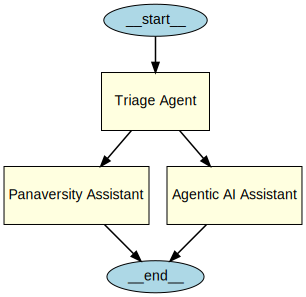

In [15]:
from agents.extensions.visualization import draw_graph

draw_graph(triage_agent)

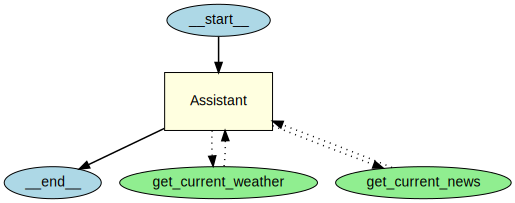

In [16]:
draw_graph(agent)